In [8]:
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [10]:
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [11]:
print("Loading datasets...")

try:
    from google.colab import files
    colab_env = True
except ImportError:
    colab_env = False

if colab_env:
    print("Running in Google Colab. Please upload your CSV files.")
    uploaded = files.upload()

    if 'twitter_training.csv' not in uploaded or 'twitter_validation.csv' not in uploaded:
        print("Error: Both 'twitter_training.csv' and 'twitter_validation.csv' must be uploaded.")
        exit()
    print("Files uploaded successfully to Colab environment.")

try:

    train_df = pd.read_csv('twitter_training.csv', names=['Tweet_ID', 'Entity', 'Sentiment', 'Tweet_Content'])
    val_df = pd.read_csv('twitter_validation.csv', names=['Tweet_ID', 'Entity', 'Sentiment', 'Tweet_Content'])
    print("Datasets loaded successfully.")
except FileNotFoundError:
    print("Error: Make sure 'twitter_training.csv' and 'twitter_validation.csv' are in the same directory.")
    print("If running in Colab, ensure you have uploaded the files.")
    exit()

Loading datasets...
Running in Google Colab. Please upload your CSV files.


Saving twitter_training.csv to twitter_training.csv
Saving twitter_validation.csv to twitter_validation.csv
Files uploaded successfully to Colab environment.
Datasets loaded successfully.


In [12]:
print("\n--- Training Data Info ---")
print(train_df.info())
print("\n--- Training Data Head ---")
print(train_df.head())
print("\n--- Training Sentiment Distribution ---")
print(train_df['Sentiment'].value_counts())

print("\n--- Validation Data Info ---")
print(val_df.info())
print("\n--- Validation Data Head ---")
print(val_df.head())
print("\n--- Validation Sentiment Distribution ---")
print(val_df['Sentiment'].value_counts())

print("\nMissing values in training data:\n", train_df.isnull().sum())
print("\nMissing values in validation data:\n", val_df.isnull().sum())

train_df['Tweet_Content'].fillna('', inplace=True)
val_df['Tweet_Content'].fillna('', inplace=True)


--- Training Data Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74682 entries, 0 to 74681
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Tweet_ID       74682 non-null  int64 
 1   Entity         74682 non-null  object
 2   Sentiment      74682 non-null  object
 3   Tweet_Content  73996 non-null  object
dtypes: int64(1), object(3)
memory usage: 2.3+ MB
None

--- Training Data Head ---
   Tweet_ID       Entity Sentiment  \
0      2401  Borderlands  Positive   
1      2401  Borderlands  Positive   
2      2401  Borderlands  Positive   
3      2401  Borderlands  Positive   
4      2401  Borderlands  Positive   

                                       Tweet_Content  
0  im getting on borderlands and i will murder yo...  
1  I am coming to the borders and I will kill you...  
2  im getting on borderlands and i will kill you ...  
3  im coming on borderlands and i will murder you...  
4  im getting on bo

/tmp/ipython-input-12-670991570.py:18: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_df['Tweet_Content'].fillna('', inplace=True)
/tmp/ipython-input-12-670991570.py:19: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)'

In [13]:
print("\nPreprocessing text data...")
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

def preprocess_text(text):

    text = text.lower()

    text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)

    text = re.sub(r'@\w+|#\w+', '', text)

    text = re.sub(r'[^a-z\s]', '', text)

    tokens = text.split()

    tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words]
    return ' '.join(tokens)

train_df['Cleaned_Tweet'] = train_df['Tweet_Content'].apply(preprocess_text)
val_df['Cleaned_Tweet'] = val_df['Tweet_Content'].apply(preprocess_text)
print("Text preprocessing complete.")


Preprocessing text data...
Text preprocessing complete.


In [14]:
print("\nExtracting features using TF-IDF...")

tfidf_vectorizer = TfidfVectorizer(max_features=5000)

X_train = tfidf_vectorizer.fit_transform(train_df['Cleaned_Tweet'])
X_val = tfidf_vectorizer.transform(val_df['Cleaned_Tweet'])

y_train = train_df['Sentiment']
y_val = val_df['Sentiment']
print("TF-IDF feature extraction complete.")


Extracting features using TF-IDF...
TF-IDF feature extraction complete.


In [15]:
print("\nTraining Logistic Regression model...")
model = LogisticRegression(max_iter=1000, random_state=42, solver='liblinear')
model.fit(X_train, y_train)
print("Model training complete.")


Training Logistic Regression model...
Model training complete.


In [16]:
print("\nEvaluating model performance...")
y_pred = model.predict(X_val)

accuracy = accuracy_score(y_val, y_pred)
print(f"\nAccuracy: {accuracy:.4f}")

print("\nClassification Report:\n", classification_report(y_val, y_pred))

conf_matrix = confusion_matrix(y_val, y_pred)
print("\nConfusion Matrix:\n", conf_matrix)


Evaluating model performance...

Accuracy: 0.7680

Classification Report:
               precision    recall  f1-score   support

  Irrelevant       0.75      0.63      0.69       172
    Negative       0.73      0.86      0.79       266
     Neutral       0.83      0.69      0.76       285
    Positive       0.76      0.84      0.80       277

    accuracy                           0.77      1000
   macro avg       0.77      0.76      0.76      1000
weighted avg       0.77      0.77      0.77      1000


Confusion Matrix:
 [[109  27  10  26]
 [  6 228  13  19]
 [ 21  40 197  27]
 [ 10  17  16 234]]



Generating visualizations...


/tmp/ipython-input-17-1340840013.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Sentiment', data=train_df, palette='viridis')


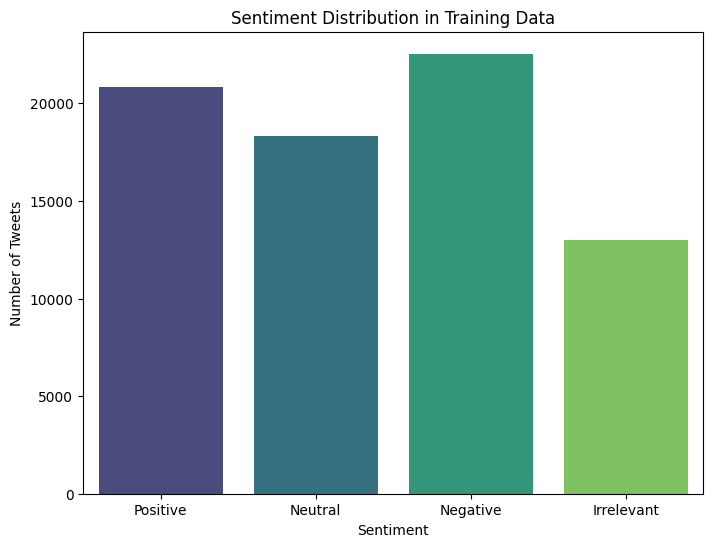

In [17]:
print("\nGenerating visualizations...")

plt.figure(figsize=(8, 6))
sns.countplot(x='Sentiment', data=train_df, palette='viridis')
plt.title('Sentiment Distribution in Training Data')
plt.xlabel('Sentiment')
plt.ylabel('Number of Tweets')
plt.show()

/tmp/ipython-input-18-3207282184.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Sentiment', data=val_df, palette='magma')


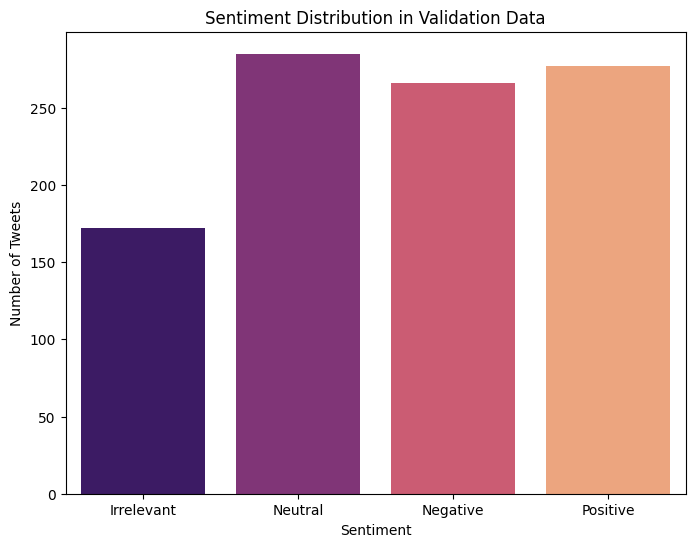

In [18]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Sentiment', data=val_df, palette='magma')
plt.title('Sentiment Distribution in Validation Data')
plt.xlabel('Sentiment')
plt.ylabel('Number of Tweets')
plt.show()

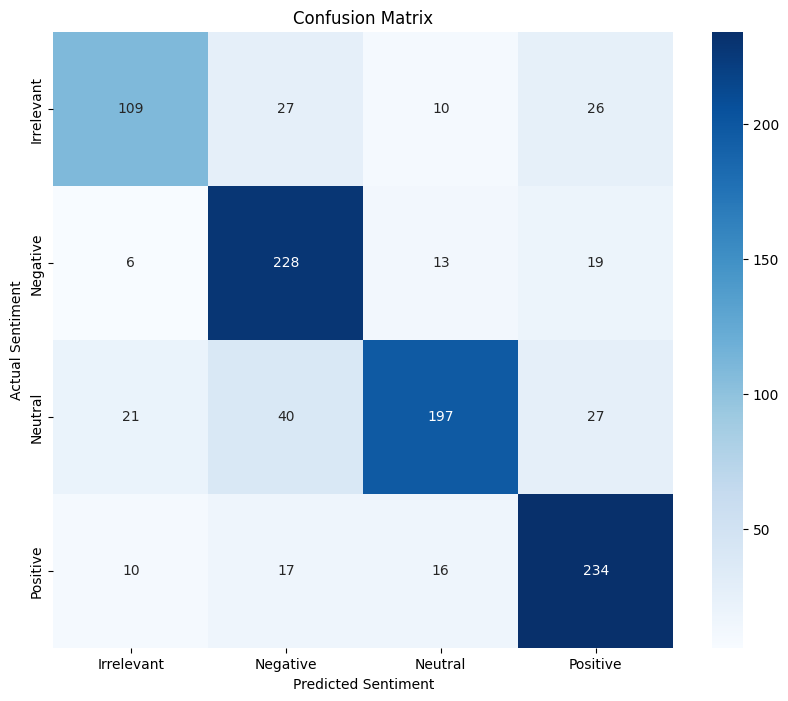

In [19]:
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=model.classes_, yticklabels=model.classes_)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Sentiment')
plt.ylabel('Actual Sentiment')
plt.show()

In [20]:
print("\nSentiment analysis and visualization complete.")


Sentiment analysis and visualization complete.
